## Trends and Disparities in U.S. Cancer Incidence (1999–2022)
### An Exploratory Analysis of Age-Adjusted Rates by Ethnicity, Race, and State

## 1. Introduction
This analysis examines long-term trends in cancer incidence across the United States from 1999 to 2022 using age-adjusted incidence rates. The objective is to identify structural disparities across ethnicity, race, and geography, and to assess whether national-level aggregation masks meaningful subgroup variation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from predict_vizualizer import predict_vizualizer
import warnings

warnings.filterwarnings("ignore")

pv = predict_vizualizer


## 2. Data Source and Scope
- **Dataset:** United States and Puerto Rico Cancer Statistics (1999–2022)
- **Unit of analysis:** State × Year × Ethnicity × Race
- **Primary metric:** Age-adjusted cancer incidence rate

Age adjustment enables valid comparisons across populations with different age structures.


In [2]:
df = pd.read_csv("United States and Puerto Rico Cancer Statistics, 1999-2022 Incidence.csv")

## 3. Data Cleaning and Preprocessing
The following preprocessing steps were applied:
- Removal of incomplete records and administrative metadata
- Conversion of numeric fields stored as strings
- Exclusion of ambiguous or aggregated race categories
- Enforcement of consistent numeric data types for time-series analysis

After cleaning, approximately 6,500 observations remained for analysis.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8241 entries, 0 to 8240
Data columns (total 15 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Notes                                            63 non-null     object 
 1   Year                                             8178 non-null   float64
 2   Year Code                                        8178 non-null   float64
 3   States                                           8178 non-null   object 
 4   States Code                                      8178 non-null   float64
 5   Ethnicity                                        8178 non-null   object 
 6   Ethnicity Code                                   8178 non-null   object 
 7   Race                                             8178 non-null   object 
 8   Race Code                                        8178 non-null   object 
 9   Count                         

In [4]:
df_cleansed = df.copy()
notes = df["Notes"]
df_cleansed = df.drop(labels=["Notes"], axis=1)

In [5]:
df_cleansed = df_cleansed[(df_cleansed["Year"].notnull())]
df_cleansed.head(5)

,Year,Year Code,States,States Code,Ethnicity,Ethnicity Code,Race,Race Code,Count,Population,Age-Adjusted Rate,Age-Adjusted Rate Lower 95% Confidence Interval,Age-Adjusted Rate Upper 95% Confidence Interval,Age-Adjusted Rate Standard Error
0,1999.0,1999.0,Alabama,1.0,Hispanic,2135-2,Black or African American,2054-5,150.0,5775,6300.3,5280.5,7438.0,543.3
1,1999.0,1999.0,Alabama,1.0,Hispanic,2135-2,White,2106-3,475.0,58333,2917.7,2642.8,3209.8,143.7
2,1999.0,1999.0,Alabama,1.0,Non-Hispanic,2186-5,American Indian or Alaska Native,1002-5,18.0,22132,133.1,70.6,224.5,37.1
3,1999.0,1999.0,Alabama,1.0,Non-Hispanic,2186-5,Asian or Pacific Islander,A-PI,67.0,32953,497.5,341.2,691.7,87.4
4,1999.0,1999.0,Alabama,1.0,Non-Hispanic,2186-5,Black or African American,2054-5,3763.0,1156898,413.5,400.4,427.0,6.8


In [6]:
df_cleansed["Year"] = df_cleansed["Year"].astype(dtype=int)
df_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8178 entries, 0 to 8177
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Year                                             8178 non-null   int64  
 1   Year Code                                        8178 non-null   float64
 2   States                                           8178 non-null   object 
 3   States Code                                      8178 non-null   float64
 4   Ethnicity                                        8178 non-null   object 
 5   Ethnicity Code                                   8178 non-null   object 
 6   Race                                             8178 non-null   object 
 7   Race Code                                        8178 non-null   object 
 8   Count                                            8178 non-null   float64
 9   Population                         

In [7]:
df_cleansed = df_cleansed.drop(
    labels=["Year Code", "States Code", "Ethnicity Code", "Race Code"], axis=1
)
df_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8178 entries, 0 to 8177
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Year                                             8178 non-null   int64  
 1   States                                           8178 non-null   object 
 2   Ethnicity                                        8178 non-null   object 
 3   Race                                             8178 non-null   object 
 4   Count                                            8178 non-null   float64
 5   Population                                       8178 non-null   object 
 6   Age-Adjusted Rate                                8178 non-null   object 
 7   Age-Adjusted Rate Lower 95% Confidence Interval  8178 non-null   object 
 8   Age-Adjusted Rate Upper 95% Confidence Interval  8178 non-null   object 
 9   Age-Adjusted Rate Standard Error   

## 4. Descriptive Statistics
Exploratory summaries of raw cancer incidence counts reveal:
- Strong right skew
- Substantial variance across states and demographic groups
- Extreme outliers

These properties motivate the use of age-adjusted rates rather than raw counts.

In [8]:
df_cleansed["Count"].describe()

count      8178.000000
mean       4684.923820
std       12624.135884
min          16.000000
25%          62.250000
50%         259.500000
75%        1903.500000
max      106882.000000
Name: Count, dtype: float64

<Axes: title={'center': 'Histogram of Cancer Case Counts per State–Demographic–Year Observation'}, ylabel='Frequency'>

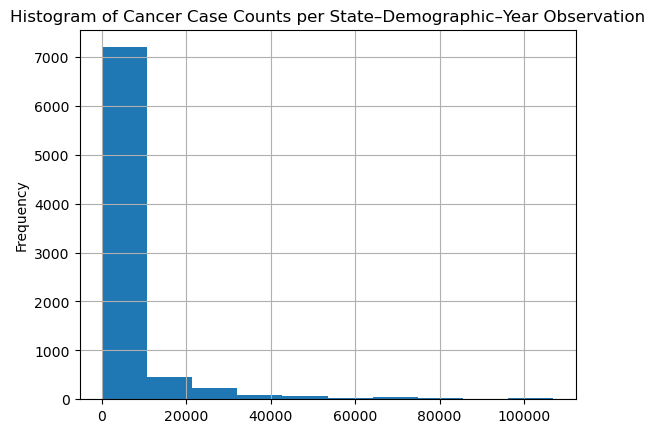

In [9]:
df_cleansed["Count"].plot(kind="hist", grid=True, title="Histogram of Cancer Case Counts per State–Demographic–Year Observation")

## 5. Overall Cancer Case Burden

Total diagnosed cancer cases in the United States exhibit a clear upward trend from 1999 to 2022, increasing from approximately 1.3 million to over 1.8 million cases annually. This rise reflects long-term demographic changes and diagnostic practices rather than increases in age-adjusted cancer incidence risk.

In [10]:
df_hist = df_cleansed[["Year", "Count"]].groupby("Year").sum()

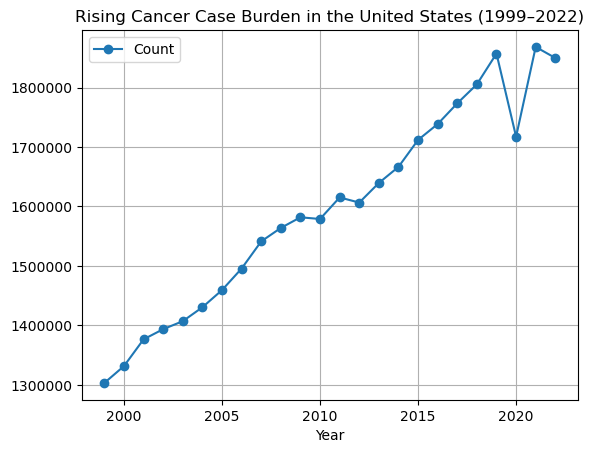

In [11]:
df_hist.plot(
    marker="o", title="Rising Cancer Case Burden in the United States (1999–2022)", grid=True, kind="line"
).ticklabel_format(style="plain", axis="y")

In [12]:
ethnicities = df_cleansed["Ethnicity"].unique().tolist()
ethnicities

['Hispanic', 'Non-Hispanic']

In [13]:
race = df_cleansed["Race"].unique().tolist()
race

['Black or African American',
 'White',
 'American Indian or Alaska Native',
 'Asian or Pacific Islander',
 'Other Races and Unknown combined']

In [14]:
df_cleansed = df_cleansed[df_cleansed["Race"] != "Other Races and Unknown combined"]
df_cleansed.head()

,Year,States,Ethnicity,Race,Count,Population,Age-Adjusted Rate,Age-Adjusted Rate Lower 95% Confidence Interval,Age-Adjusted Rate Upper 95% Confidence Interval,Age-Adjusted Rate Standard Error
0,1999,Alabama,Hispanic,Black or African American,150.0,5775,6300.3,5280.5,7438.0,543.3
1,1999,Alabama,Hispanic,White,475.0,58333,2917.7,2642.8,3209.8,143.7
2,1999,Alabama,Non-Hispanic,American Indian or Alaska Native,18.0,22132,133.1,70.6,224.5,37.1
3,1999,Alabama,Non-Hispanic,Asian or Pacific Islander,67.0,32953,497.5,341.2,691.7,87.4
4,1999,Alabama,Non-Hispanic,Black or African American,3763.0,1156898,413.5,400.4,427.0,6.8


In [15]:
df_cleansed["Age-Adjusted Rate"] = df_cleansed["Age-Adjusted Rate"].astype(dtype=float)
df_cleansed["Age-Adjusted Rate Lower 95% Confidence Interval"] = df_cleansed[
    "Age-Adjusted Rate Lower 95% Confidence Interval"
].astype(dtype=float)
df_cleansed["Age-Adjusted Rate Upper 95% Confidence Interval"] = df_cleansed[
    "Age-Adjusted Rate Upper 95% Confidence Interval"
].astype(dtype=float)
df_cleansed["Age-Adjusted Rate Standard Error"] = df_cleansed[
    "Age-Adjusted Rate Standard Error"
].astype(dtype=float)

## 6. Cancer Incidence Trends by Ethnicity

### 6.1 Raw Trends
Mean annual age-adjusted incidence rates were computed separately for:
- Hispanic populations
- Non-Hispanic populations

Across the full time horizon, Hispanic populations exhibit consistently lower incidence rates, a pattern commonly referred to as the *Hispanic Health Paradox*¹.

¹ Ruiz JM, Steffen P, Smith TB. *American Journal of Public Health*, 2013.

In [16]:
df_by_year_and_ethnicity = df_cleansed.pivot_table(
    index=["Year", "Ethnicity"],
    values=["Age-Adjusted Rate"],
    aggfunc="mean"
)
df_by_year_and_ethnicity.head(5)

Age-Adjusted Rate
Year Ethnicity                      
1999 Hispanic             500.114493
     Non-Hispanic         421.068263
2000 Hispanic             370.257534
     Non-Hispanic         423.171345
2001 Hispanic             372.548571

<Axes: title={'center': 'Age-Adjusted Rates by Ethnicity'}, xlabel='Year'>

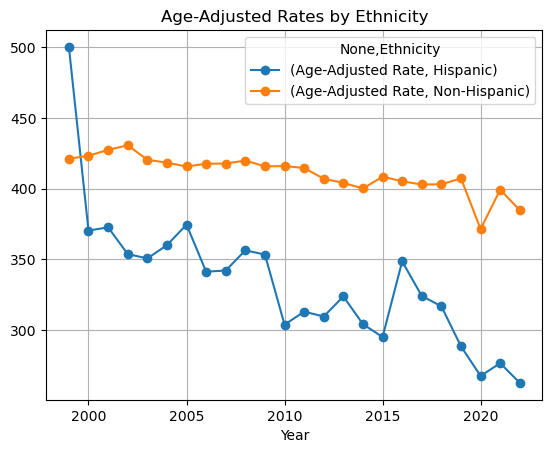

In [17]:
df_by_year_and_ethnicity.unstack().plot(marker = "o", grid=True, title="Age-Adjusted Rates by Ethnicity")

In [18]:
df_by_year_and_ethnicity_hispanic = df_by_year_and_ethnicity.xs("Hispanic", level="Ethnicity")
df_by_year_and_ethnicity_hispanic.head()

,Age-Adjusted Rate
Year,
1999,500.114493
2000,370.257534
2001,372.548571
2002,353.676712
2003,350.562162


In [19]:
df_by_year_and_ethnicity_nhispanic = df_by_year_and_ethnicity.xs("Non-Hispanic", level="Ethnicity")
df_by_year_and_ethnicity_nhispanic.head()

,Age-Adjusted Rate
Year,
1999,421.068263
2000,423.171345
2001,427.321765
2002,430.570520
2003,420.346927


### 6.2 Smoothed Trends
To reduce year-to-year noise, rolling averages were applied to each ethnic subgroup.

Key observations:
- Long-term declines are evident for both groups
- Hispanic trends show steeper declines but greater volatility
- COVID-era years introduce visible disruption

In [20]:
df_by_year_and_ethnicity_nhispanic_smooth = df_by_year_and_ethnicity_nhispanic.copy()
df_by_year_and_ethnicity_nhispanic_smooth["Age-Adjusted Rate"] = (
    df_by_year_and_ethnicity_nhispanic_smooth["Age-Adjusted Rate"].rolling(4, min_periods=1).mean()
)

In [21]:
df_by_year_and_ethnicity_hispanic_smooth = df_by_year_and_ethnicity_hispanic.copy()
df_by_year_and_ethnicity_hispanic_smooth["Age-Adjusted Rate"] = (
    df_by_year_and_ethnicity_hispanic_smooth["Age-Adjusted Rate"].rolling(4, min_periods=1).mean()
)

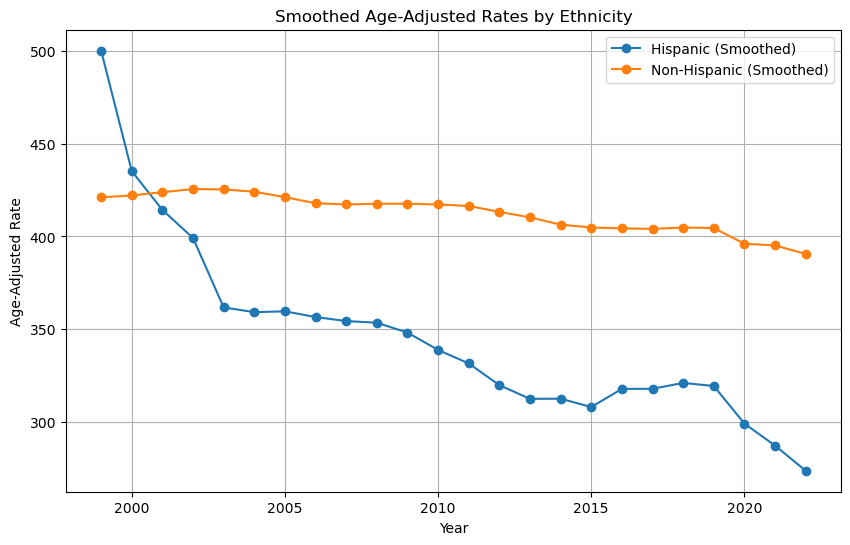

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))


ax.plot(
    df_by_year_and_ethnicity_hispanic_smooth.index.get_level_values("Year"),
    df_by_year_and_ethnicity_hispanic_smooth["Age-Adjusted Rate"],
    marker="o",
    label="Hispanic (Smoothed)",
    color="#1f77b4",
)

ax.plot(
    df_by_year_and_ethnicity_nhispanic_smooth.index.get_level_values("Year"),
    df_by_year_and_ethnicity_nhispanic_smooth["Age-Adjusted Rate"],
    marker="o",
    label="Non-Hispanic (Smoothed)",
    color="#ff7f0e",
)


ax.set_title("Smoothed Age-Adjusted Rates by Ethnicity")
ax.set_xlabel("Year")
ax.set_ylabel("Age-Adjusted Rate")
ax.legend()
ax.grid(True)

## 7. Cancer Incidence Trends by Race

In [23]:
df_by_year_and_race = df_cleansed.pivot_table(
    index=["Year", "Race"],
    values=["Age-Adjusted Rate"],
    aggfunc="mean"
)
df_by_year_and_race.head()

Age-Adjusted Rate
Year Race                                               
1999 American Indian or Alaska Native         362.100000
     Asian or Pacific Islander                299.802083
     Black or African American                564.225000
     White                                    477.120833
2000 American Indian or Alaska Native         360.926316

Age-adjusted incidence rates were analyzed for the following racial groups:
- White
- Black or African American
- Asian or Pacific Islander
- American Indian or Alaska Native

Persistent level differences are observed across the entire period, with White populations exhibiting historically higher incidence rates.


<Axes: title={'center': 'Age-Adjusted Rates by Race'}, xlabel='Year'>

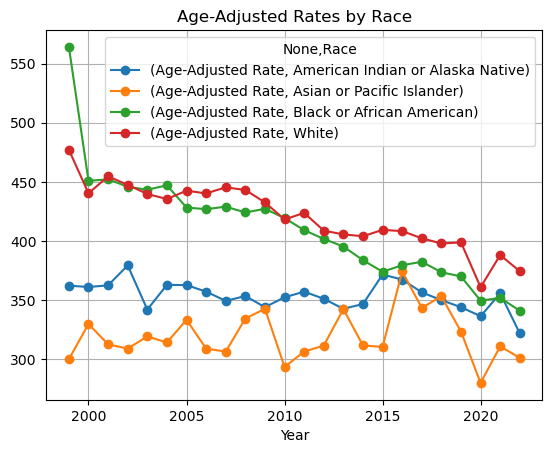

In [24]:
df_by_year_and_race.unstack().plot(marker = "o",grid=True, title="Age-Adjusted Rates by Race")

## 8. Regression Analysis: Race × Time
An ordinary least squares (OLS) regression model with interaction terms between year and race was estimated to assess differential temporal trends.

### Key findings:
- Strong overall model fit (R² ≈ 0.90)
- Statistically significant declining trends for:
  - Black or African American populations
  - White populations
- Weaker or non-significant trends for smaller racial groups

In particular, Asian or Pacific Islander populations exhibit the least statistically significant association with temporal change (interaction p ≈ 0.104), indicating minimal contribution to overall trend dynamics both in terms of volume and trend influence.

These results indicate that observed national declines are not uniform across racial groups.

In [25]:
import statsmodels.formula.api as smf

df_by_year_and_race_regressed = df_by_year_and_race.reset_index()

ethnicity_model = smf.ols("Q('Age-Adjusted Rate') ~ Year * Race", data=df_by_year_and_race_regressed).fit()
print(ethnicity_model.summary())

                              OLS Regression Results                              
Dep. Variable:     Q('Age-Adjusted Rate')   R-squared:                       0.903
Model:                                OLS   Adj. R-squared:                  0.895
Method:                     Least Squares   F-statistic:                     117.2
Date:                    Thu, 08 Jan 2026   Prob (F-statistic):           8.22e-42
Time:                            06:56:44   Log-Likelihood:                -401.40
No. Observations:                      96   AIC:                             818.8
Df Residuals:                          88   BIC:                             839.3
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [26]:
df_cleansed.head()

,Year,States,Ethnicity,Race,Count,Population,Age-Adjusted Rate,Age-Adjusted Rate Lower 95% Confidence Interval,Age-Adjusted Rate Upper 95% Confidence Interval,Age-Adjusted Rate Standard Error
0,1999,Alabama,Hispanic,Black or African American,150.0,5775,6300.3,5280.5,7438.0,543.3
1,1999,Alabama,Hispanic,White,475.0,58333,2917.7,2642.8,3209.8,143.7
2,1999,Alabama,Non-Hispanic,American Indian or Alaska Native,18.0,22132,133.1,70.6,224.5,37.1
3,1999,Alabama,Non-Hispanic,Asian or Pacific Islander,67.0,32953,497.5,341.2,691.7,87.4
4,1999,Alabama,Non-Hispanic,Black or African American,3763.0,1156898,413.5,400.4,427.0,6.8


## 9. State-Level Trend Analysis
Separate linear regressions were fit for each state to estimate the annual change in age-adjusted cancer incidence rates. This approach allows direct comparison of state-specific trends rather than reliance on national averages.


## 9. State-Level Trend Analysis
Separate linear regressions were fit for each state to estimate how age-adjusted cancer incidence rates change over time. This makes it possible to compare state-level trends directly instead of relying on national averages.

To add context, mean age-adjusted incidence rates were also calculated for each state across the full time period. Most states fall in a fairly tight range (roughly 300–450 cases per 100,000), which shows that overall cancer burden is broadly similar across much of the country.

One clear exception is Hawaii. Its mean age-adjusted incidence rate is much higher (about 610), standing out as a clear outlier in the distribution. This difference shows up clearly in the histogram and is consistent over time, suggesting it reflects a persistent state-level pattern rather than year-to-year noise.

Looking at both trend slopes and overall levels helps separate states that are changing faster from those that simply sit at higher or lower incidence levels, details that get lost in national summaries.


In [27]:
df_by_year_and_states = df_cleansed.pivot_table(
    index=["Year", "States"],
    values=["Age-Adjusted Rate"],
    aggfunc="mean"
)
df_by_year_and_states

Age-Adjusted Rate
Year States                          
1999 Alabama              1779.000000
     Alaska                517.980000
     Arizona               315.216667
     Arkansas              362.180000
     California            302.687500
...                               ...
2022 Virginia              318.585714
     Washington            378.687500
     West Virginia         346.000000
     Wisconsin             400.666667
     Wyoming               368.325000

[1218 rows x 1 columns]

In [40]:
df_by_state = df_cleansed.pivot_table(
    index=["States"],
    values=["Age-Adjusted Rate"],
    aggfunc="mean"
)
df_by_state.head()

,Age-Adjusted Rate
States,
Alabama,380.807438
Alaska,440.098333
Arizona,293.200000
Arkansas,398.299187
California,297.297396


In [49]:
df_by_state.describe()

,Age-Adjusted Rate
count,51.000000
mean,388.708545
std,54.186439
min,293.200000
25%,355.270830
50%,382.877083
75%,413.882171
max,610.363830


(array([ 5.,  8., 15., 11.,  6.,  5.,  0.,  0.,  0.,  1.]),
 array([293.2       , 324.91638298, 356.63276596, 388.34914894,
        420.06553191, 451.78191489, 483.49829787, 515.21468085,
        546.93106383, 578.64744681, 610.36382979]),
 <BarContainer object of 10 artists>)

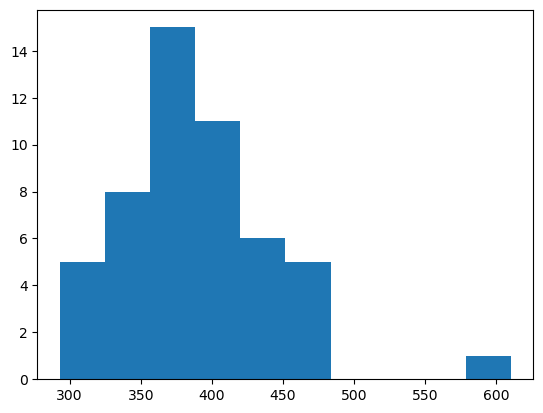

In [46]:
plt.hist(df_by_state.values)

In [48]:
df_by_state[df_by_state["Age-Adjusted Rate"]>550]

,Age-Adjusted Rate
States,
Hawaii,610.36383


In [29]:
import statsmodels.formula.api as smf

state_coefs = {}
for state, i in zip(df_cleansed["States"].unique().tolist(),range(51)):
    i+=1
    df_by_year_and_states_regressed = df_by_year_and_states.xs(state, level="States")
    df_by_year_and_states_regressed = df_by_year_and_states_regressed.reset_index()
    state_model = smf.ols("Q('Age-Adjusted Rate') ~ Year", data=df_by_year_and_states_regressed).fit()
    year_coef = state_model.params["Year"]
    state_coefs[state] = year_coef





In [30]:
states_list = list(state_coefs.keys())[0:5]

for state in states_list:
    print(f"{state}: {state_coefs[state]}")

Alabama: -17.085858695649808
Alaska: -3.816156521739155
Arizona: -3.3440131987578976
Arkansas: 2.669892753623249
California: -0.9350489130435156


In [31]:
by_state = pd.DataFrame(list(state_coefs.items()), columns=["States", "Coefficient"])

In [32]:
by_state.head()

,States,Coefficient
0,Alabama,-17.085859
1,Alaska,-3.816157
2,Arizona,-3.344013
3,Arkansas,2.669893
4,California,-0.935049


## 10. Extreme State Trends

### 10.1 States with the Steepest Declines
- Alabama  
- Vermont  
- Maine  

### 10.2 States with Increasing or Flat Trends
- Hawaii  
- Arkansas  
- Georgia  

These states were visualized jointly to highlight divergence in long-run cancer incidence trajectories.


In [33]:
top_3 = by_state.sort_values(by="Coefficient",ascending=True).iloc[0:3]
top_3

,States,Coefficient
0,Alabama,-17.085859
43,Vermont,-10.511435
19,Maine,-9.356141


In [34]:
bottom_3 = by_state.sort_values(by="Coefficient",ascending=False).iloc[0:3]
bottom_3

,States,Coefficient
11,Hawaii,7.979796
3,Arkansas,2.669893
10,Georgia,2.423289


In [35]:
top_and_bottom = pd.concat([top_3,bottom_3],axis=0)
top_and_bottom

,States,Coefficient
0,Alabama,-17.085859
43,Vermont,-10.511435
19,Maine,-9.356141
11,Hawaii,7.979796
3,Arkansas,2.669893
10,Georgia,2.423289


<Axes: title={'center': 'Extreme State Trends in Age-Adjusted Cancer Incidence'}, xlabel='Year'>

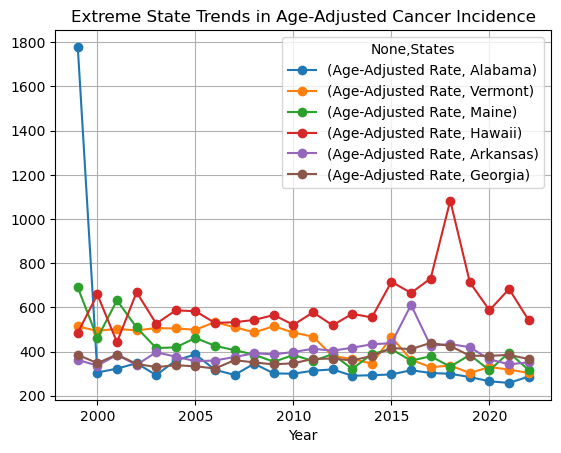

In [36]:
df_by_year_and_states.loc[(slice(None),top_and_bottom["States"].to_list()),:].unstack().plot(marker = "o",grid=True, title="Extreme State Trends in Age-Adjusted Cancer Incidence")

## 13. Limitations
Estimates are based on unweighted means rather than population-weighted rates; however, they remain sufficient for inferential assessment of relative temporal trends.


## 14. Conclusion
While cancer incidence in the United States has generally declined since 1999, meaningful disparities persist across race, ethnicity, and geography. State-level and subgroup-specific analyses reveal trends that are invisible in national aggregates, underscoring the importance of disaggregated analysis in public health research.